# 전체 SNP

In [151]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score

# Load data
train_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_conti.phe', delim_whitespace=True)
train_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_binary.phe', delim_whitespace=True)
test_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_conti.phe', delim_whitespace=True)
test_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_binary.phe', delim_whitespace=True)
train_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n300_p1000.mldose', delim_whitespace=True)
test_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n150_p1000.mldose', delim_whitespace=True)

# relevant columns
X_train = train_geno.iloc[:, 2:].values  # SNP data
y_train_conti = train_pheno_conti.iloc[:, 2].values
y_train_binary = train_pheno_binary.iloc[:, 2].values

X_test = test_geno.iloc[:, 2:].values
y_test_conti = test_pheno_conti.iloc[:, 2].values
y_test_binary = test_pheno_binary.iloc[:, 2].values

# missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train_conti = np.nan_to_num(y_train_conti)
y_test_conti = np.nan_to_num(y_test_conti)

In [152]:
print(train_pheno_conti.head())
print(train_geno.head())

   1  1.1  -2.90239391030743  -0.293451986818407
0  2    2          -0.458173           -1.216158
1  3    3           1.054707            0.522783
2  4    4           0.323021            1.046023
3  5    5           0.139497            2.440253
4  6    6           0.810525           -0.762785
   1  1.1      0  1.999  0.002  0.002.1  0.064  0.997    0.1  0.998  ...  \
0  2    2  0.014  1.999  1.452    1.007  1.482  1.952  0.067  0.998  ...   
1  3    3  0.000  2.000  0.001    1.020  1.980  1.998  1.996  2.000  ...   
2  4    4  0.754  1.995  1.001    2.000  1.996  1.999  0.000  1.999  ...   
3  5    5  0.001  0.961  1.999    2.000  1.998  1.999  0.000  1.213  ...   
4  6    6  0.013  1.003  1.000    1.996  1.121  1.996  0.002  1.030  ...   

   1.999.64  2.260  1.999.65  2.261  2.262  1.989.3   0.79  0.267  2.263  \
0     0.001  0.000     0.000  1.999  2.000    1.014  0.004  0.995  2.000   
1     2.000  2.000     1.999  1.010  1.002    1.264  0.000  0.007  1.992   
2     0.999  1.000   

In [153]:
# lr
lr_model = Sequential()
lr_model.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))
lr_model.compile(optimizer='sgd', loss='mean_squared_error')

# Train
lr_history = lr_model.fit(X_train, y_train_conti, epochs=1000, verbose=1, validation_data=(X_test, y_test_conti))


Epoch 1/1000
10/10 [==============================] - 1s 24ms/step - loss: 2243867409362275676597518336.0000 - val_loss: 92317627905120432017557214461952.0000
Epoch 2/1000
10/10 [==============================] - 0s 11ms/step - loss: inf - val_loss: inf             
Epoch 3/1000
10/10 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 4/1000
10/10 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 7/1000
10/10 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 8/1000
10/10 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 9/1000
10/10 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 10/1000
10/10 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 3ms/step - loss: nan
Test MSE (Linear Regression): nan


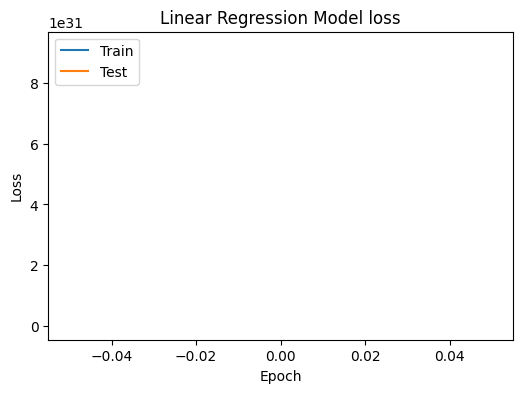

In [154]:
# Evaluate
mse = lr_model.evaluate(X_test, y_test_conti)
print(f'Test MSE (Linear Regression): {mse:.4f}')

# Visualization
plt.figure(figsize=(6, 4))
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Linear Regression Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [97]:
# classification
clf_model = Sequential()
clf_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
clf_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train
clf_history = clf_model.fit(X_train, y_train_binary, epochs=1000, verbose=1, validation_data=(X_test, y_test_binary))

Epoch 1/1000
10/10 [==============================] - 1s 34ms/step - loss: 1.0110 - accuracy: 0.6990 - val_loss: 0.7190 - val_accuracy: 0.8054
Epoch 2/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.1009 - accuracy: 0.6589 - val_loss: 1.2390 - val_accuracy: 0.8054
Epoch 3/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.9194 - accuracy: 0.7023 - val_loss: 0.5047 - val_accuracy: 0.8054
Epoch 4/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.5415 - accuracy: 0.7692 - val_loss: 0.5090 - val_accuracy: 0.8054
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.6755 - accuracy: 0.7759 - val_loss: 0.5352 - val_accuracy: 0.7450
Epoch 6/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.1447 - accuracy: 0.6789 - val_loss: 0.6072 - val_accuracy: 0.6309
Epoch 7/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.8129 - accuracy: 0.7057 - val_loss: 0.7576 - val_accuracy: 0.8054
E

In [ ]:
# Evaluate
loss, accuracy = clf_model.evaluate(X_test, y_test_binary)
print(f'Test Accuracy (Classification): {accuracy:.4f}')

In [98]:
# CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
cnn_history = cnn_model.fit(X_train_cnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_binary))

Epoch 1/50
10/10 [==============================] - 1s 38ms/step - loss: 0.7412 - accuracy: 0.6923 - val_loss: 0.8644 - val_accuracy: 0.8054
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.7215 - accuracy: 0.8060 - val_loss: 0.5320 - val_accuracy: 0.8054
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.5206 - accuracy: 0.7993 - val_loss: 0.4896 - val_accuracy: 0.8054
Epoch 4/50
10/10 [==============================] - 0s 13ms/step - loss: 0.4640 - accuracy: 0.7993 - val_loss: 0.4896 - val_accuracy: 0.8054
Epoch 5/50
10/10 [==============================] - 0s 12ms/step - loss: 0.4362 - accuracy: 0.7993 - val_loss: 0.4882 - val_accuracy: 0.8054
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4097 - accuracy: 0.8027 - val_loss: 0.4878 - val_accuracy: 0.8054
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.3624 - accuracy: 0.8060 - val_loss: 0.5086 - val_accuracy: 0.7987
Epoch 8/50
10

In [ ]:
# Evaluate
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_binary)
print(f'Test Accuracy (CNN): {accuracy:.4f}')

In [99]:
# RNN
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
rnn_history = rnn_model.fit(X_train_rnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_rnn, y_test_binary))

Epoch 1/50
10/10 [==============================] - 8s 643ms/step - loss: 0.5633 - accuracy: 0.7960 - val_loss: 0.5087 - val_accuracy: 0.8054
Epoch 2/50
10/10 [==============================] - 7s 660ms/step - loss: 0.5075 - accuracy: 0.7993 - val_loss: 0.4865 - val_accuracy: 0.8054
Epoch 3/50
10/10 [==============================] - 6s 557ms/step - loss: 0.5002 - accuracy: 0.7993 - val_loss: 0.4856 - val_accuracy: 0.8054
Epoch 4/50
10/10 [==============================] - 7s 725ms/step - loss: 0.4960 - accuracy: 0.7993 - val_loss: 0.4837 - val_accuracy: 0.8054
Epoch 5/50
10/10 [==============================] - 6s 587ms/step - loss: 0.4970 - accuracy: 0.7993 - val_loss: 0.4876 - val_accuracy: 0.8054
Epoch 6/50
10/10 [==============================] - 8s 797ms/step - loss: 0.4947 - accuracy: 0.7993 - val_loss: 0.4838 - val_accuracy: 0.8054
Epoch 7/50
10/10 [==============================] - 6s 553ms/step - loss: 0.4917 - accuracy: 0.7993 - val_loss: 0.4818 - val_accuracy: 0.8054
Epoch 

In [ ]:
# Evaluate
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test_binary)
print(f'Test Accuracy (RNN): {accuracy:.4f}')

In [100]:
# AUC Score
y_pred_binary_clf = clf_model.predict(X_test).ravel()
auc_clf = roc_auc_score(y_test_binary, y_pred_binary_clf)
print(f'Test AUC (Classification): {auc_clf:.4f}')

y_pred_binary_cnn = cnn_model.predict(X_test_cnn).ravel()
auc_cnn = roc_auc_score(y_test_binary, y_pred_binary_cnn)
print(f'Test AUC (CNN): {auc_cnn:.4f}')

y_pred_binary_rnn = rnn_model.predict(X_test_rnn).ravel()
auc_rnn = roc_auc_score(y_test_binary, y_pred_binary_rnn)
print(f'Test AUC (RNN): {auc_rnn:.4f}')


5/5 [==============================] - 0s 2ms/step
Test AUC (Classification): 0.6716
5/5 [==============================] - 0s 2ms/step
Test AUC (CNN): 0.5813
5/5 [==============================] - 1s 75ms/step
Test AUC (RNN): 0.5779


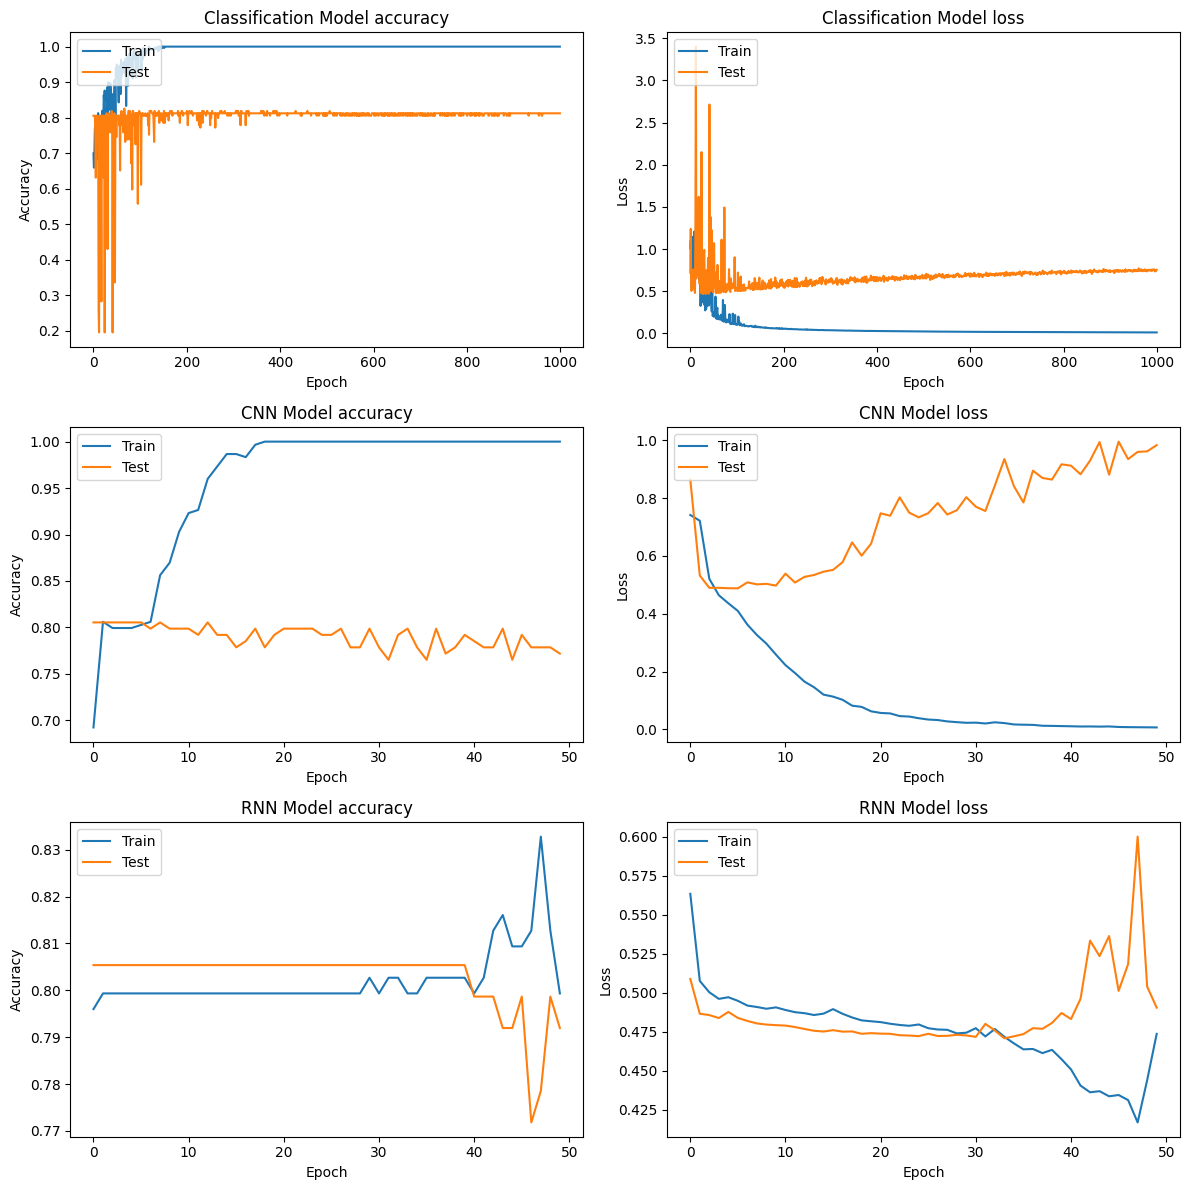

In [103]:
# Visualization
plt.figure(figsize=(12, 12))

# Classification
plt.subplot(3, 2, 1)
plt.plot(clf_history.history['accuracy'])
plt.plot(clf_history.history['val_accuracy'])
plt.title('Classification Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 2)
plt.plot(clf_history.history['loss'])
plt.plot(clf_history.history['val_loss'])
plt.title('Classification Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# CNN
plt.subplot(3, 2, 3)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 4)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# RNN
plt.subplot(3, 2, 5)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 6)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


# 일부 SNP 선택

In [155]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score

# Load data
train_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_conti.phe', delim_whitespace=True)
train_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_binary.phe', delim_whitespace=True)
test_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_conti.phe', delim_whitespace=True)
test_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_binary.phe', delim_whitespace=True)
train_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n300_p1000.mldose', delim_whitespace=True)
test_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n150_p1000.mldose', delim_whitespace=True)

# relevant columns
X_train = train_geno.iloc[:, 2:].values  # SNP data
y_train_conti = train_pheno_conti.iloc[:, 2].values  # Continuous phenotype
y_train_binary = train_pheno_binary.iloc[:, 2].values  # Binary phenotype

X_test = test_geno.iloc[:, 2:].values
y_test_conti = test_pheno_conti.iloc[:, 2].values
y_test_binary = test_pheno_binary.iloc[:, 2].values

# missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train_conti = np.nan_to_num(y_train_conti)
y_test_conti = np.nan_to_num(y_test_conti)

In [156]:
print(train_pheno_conti.head())
print(train_geno.head())

   1  1.1  -2.90239391030743  -0.293451986818407
0  2    2          -0.458173           -1.216158
1  3    3           1.054707            0.522783
2  4    4           0.323021            1.046023
3  5    5           0.139497            2.440253
4  6    6           0.810525           -0.762785
   1  1.1      0  1.999  0.002  0.002.1  0.064  0.997    0.1  0.998  ...  \
0  2    2  0.014  1.999  1.452    1.007  1.482  1.952  0.067  0.998  ...   
1  3    3  0.000  2.000  0.001    1.020  1.980  1.998  1.996  2.000  ...   
2  4    4  0.754  1.995  1.001    2.000  1.996  1.999  0.000  1.999  ...   
3  5    5  0.001  0.961  1.999    2.000  1.998  1.999  0.000  1.213  ...   
4  6    6  0.013  1.003  1.000    1.996  1.121  1.996  0.002  1.030  ...   

   1.999.64  2.260  1.999.65  2.261  2.262  1.989.3   0.79  0.267  2.263  \
0     0.001  0.000     0.000  1.999  2.000    1.014  0.004  0.995  2.000   
1     2.000  2.000     1.999  1.010  1.002    1.264  0.000  0.007  1.992   
2     0.999  1.000   

In [157]:
# Select top 100 SNP with highest var
variances = np.var(X_train, axis=0)
top_snp_indices = np.argsort(variances)[-100:]
X_train_selected = X_train[:, top_snp_indices]
X_test_selected = X_test[:, top_snp_indices]


In [158]:
# lr
lr_model = Sequential()
lr_model.add(Dense(1, input_dim=X_train_selected.shape[1], activation='linear'))

lr_model.compile(optimizer='sgd', loss='mean_squared_error')

# Train
lr_history = lr_model.fit(X_train_selected, y_train_conti, epochs=1000, verbose=1, validation_data=(X_test_selected, y_test_conti))

Epoch 1/1000
10/10 [==============================] - 0s 17ms/step - loss: 11.7855 - val_loss: 33.7617
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 67.5878 - val_loss: 191.0525
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 484.3633 - val_loss: 975.1405
Epoch 4/1000
10/10 [==============================] - 0s 8ms/step - loss: 2420.4265 - val_loss: 5932.0542
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 14266.4033 - val_loss: 27568.9141
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 70363.8359 - val_loss: 183464.3125
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 463280.1562 - val_loss: 1016329.1250
Epoch 8/1000
10/10 [==============================] - 0s 7ms/step - loss: 2482490.7500 - val_loss: 6144546.5000
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 13203623.0000 - val_loss: 37626748.0000
Epoch 10/1000
10/10 [=========

5/5 [==============================] - 0s 3ms/step - loss: nan
Test MSE (Linear Regression): nan


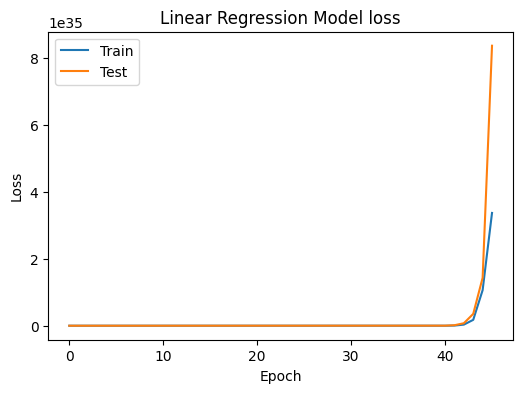

In [159]:
# Evaluate
mse = lr_model.evaluate(X_test_selected, y_test_conti)
print(f'Test MSE (Linear Regression): {mse:.4f}')

# Plot training & validation loss values for Linear Regression Model
plt.figure(figsize=(6, 4))
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Linear Regression Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [108]:
# classification
clf_model = Sequential()
clf_model.add(Dense(1, input_dim=X_train_selected.shape[1], activation='sigmoid'))

clf_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train
clf_history = clf_model.fit(X_train_selected, y_train_binary, epochs=1000, verbose=1, validation_data=(X_test_selected, y_test_binary))


Epoch 1/1000
10/10 [==============================] - 1s 31ms/step - loss: 0.9363 - accuracy: 0.4783 - val_loss: 0.5465 - val_accuracy: 0.7651
Epoch 2/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.5659 - accuracy: 0.7559 - val_loss: 0.5301 - val_accuracy: 0.7919
Epoch 3/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.5605 - accuracy: 0.7659 - val_loss: 0.5307 - val_accuracy: 0.7987
Epoch 4/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.5566 - accuracy: 0.7726 - val_loss: 0.5311 - val_accuracy: 0.7987
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5548 - accuracy: 0.7793 - val_loss: 0.5282 - val_accuracy: 0.7852
Epoch 6/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5521 - accuracy: 0.7726 - val_loss: 0.5299 - val_accuracy: 0.7852
Epoch 7/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.5492 - accuracy: 0.7726 - val_loss: 0.5250 - val_accuracy: 0.7852
Ep

In [114]:
# Evaluate
loss, accuracy = clf_model.evaluate(X_test_selected, y_test_binary)
print(f'Test Accuracy (Classification): {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.7383
Test Accuracy (Classification): 0.7383


In [109]:
# CNN
X_train_cnn = np.expand_dims(X_train_selected, axis=2)
X_test_cnn = np.expand_dims(X_test_selected, axis=2)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
cnn_history = cnn_model.fit(X_train_cnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_binary))

Epoch 1/50
10/10 [==============================] - 2s 38ms/step - loss: 0.6334 - accuracy: 0.6455 - val_loss: 0.5287 - val_accuracy: 0.8054
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 0.5280 - accuracy: 0.7993 - val_loss: 0.4982 - val_accuracy: 0.8054
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.5042 - accuracy: 0.7993 - val_loss: 0.5081 - val_accuracy: 0.8054
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.4961 - accuracy: 0.7993 - val_loss: 0.4957 - val_accuracy: 0.8054
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4977 - accuracy: 0.7993 - val_loss: 0.4984 - val_accuracy: 0.8054
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 0.4829 - accuracy: 0.7993 - val_loss: 0.5020 - val_accuracy: 0.8054
Epoch 7/50
10/10 [==============================] - 0s 13ms/step - loss: 0.4886 - accuracy: 0.7993 - val_loss: 0.4932 - val_accuracy: 0.8054
Epoch 8/50
10

In [115]:
# Evaluate
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_binary)
print(f'Test Accuracy (CNN): {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.4994 - accuracy: 0.7718
Test Accuracy (CNN): 0.7718


In [110]:
# RNN
X_train_rnn = np.expand_dims(X_train_selected, axis=2)
X_test_rnn = np.expand_dims(X_test_selected, axis=2)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_selected.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
rnn_history = rnn_model.fit(X_train_rnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_rnn, y_test_binary))

Epoch 1/50
10/10 [==============================] - 3s 173ms/step - loss: 0.6442 - accuracy: 0.7057 - val_loss: 0.5993 - val_accuracy: 0.8054
Epoch 2/50
10/10 [==============================] - 1s 125ms/step - loss: 0.5552 - accuracy: 0.7993 - val_loss: 0.5057 - val_accuracy: 0.8054
Epoch 3/50
10/10 [==============================] - 2s 167ms/step - loss: 0.5101 - accuracy: 0.7993 - val_loss: 0.5049 - val_accuracy: 0.8054
Epoch 4/50
10/10 [==============================] - 1s 146ms/step - loss: 0.5083 - accuracy: 0.7993 - val_loss: 0.5040 - val_accuracy: 0.8054
Epoch 5/50
10/10 [==============================] - 2s 174ms/step - loss: 0.5084 - accuracy: 0.7993 - val_loss: 0.5096 - val_accuracy: 0.8054
Epoch 6/50
10/10 [==============================] - 1s 131ms/step - loss: 0.5027 - accuracy: 0.7993 - val_loss: 0.5086 - val_accuracy: 0.8054
Epoch 7/50
10/10 [==============================] - 1s 140ms/step - loss: 0.5133 - accuracy: 0.7993 - val_loss: 0.5075 - val_accuracy: 0.8054
Epoch 

In [116]:
# Evaluate
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test_binary)
print(f'Test Accuracy (RNN): {accuracy:.4f}')

5/5 [==============================] - 0s 21ms/step - loss: 0.6371 - accuracy: 0.8054
Test Accuracy (RNN): 0.8054


In [111]:
# AUC Score
y_pred_binary_clf = clf_model.predict(X_test_selected).ravel()
auc_clf = roc_auc_score(y_test_binary, y_pred_binary_clf)
print(f'Test AUC (Classification): {auc_clf:.4f}')

y_pred_binary_cnn = cnn_model.predict(X_test_cnn).ravel()
auc_cnn = roc_auc_score(y_test_binary, y_pred_binary_cnn)
print(f'Test AUC (CNN): {auc_cnn:.4f}')

y_pred_binary_rnn = rnn_model.predict(X_test_rnn).ravel()
auc_rnn = roc_auc_score(y_test_binary, y_pred_binary_rnn)
print(f'Test AUC (RNN): {auc_rnn:.4f}')


5/5 [==============================] - 0s 3ms/step
Test AUC (Classification): 0.6135
5/5 [==============================] - 0s 3ms/step
Test AUC (CNN): 0.6626
5/5 [==============================] - 0s 19ms/step
Test AUC (RNN): 0.3951


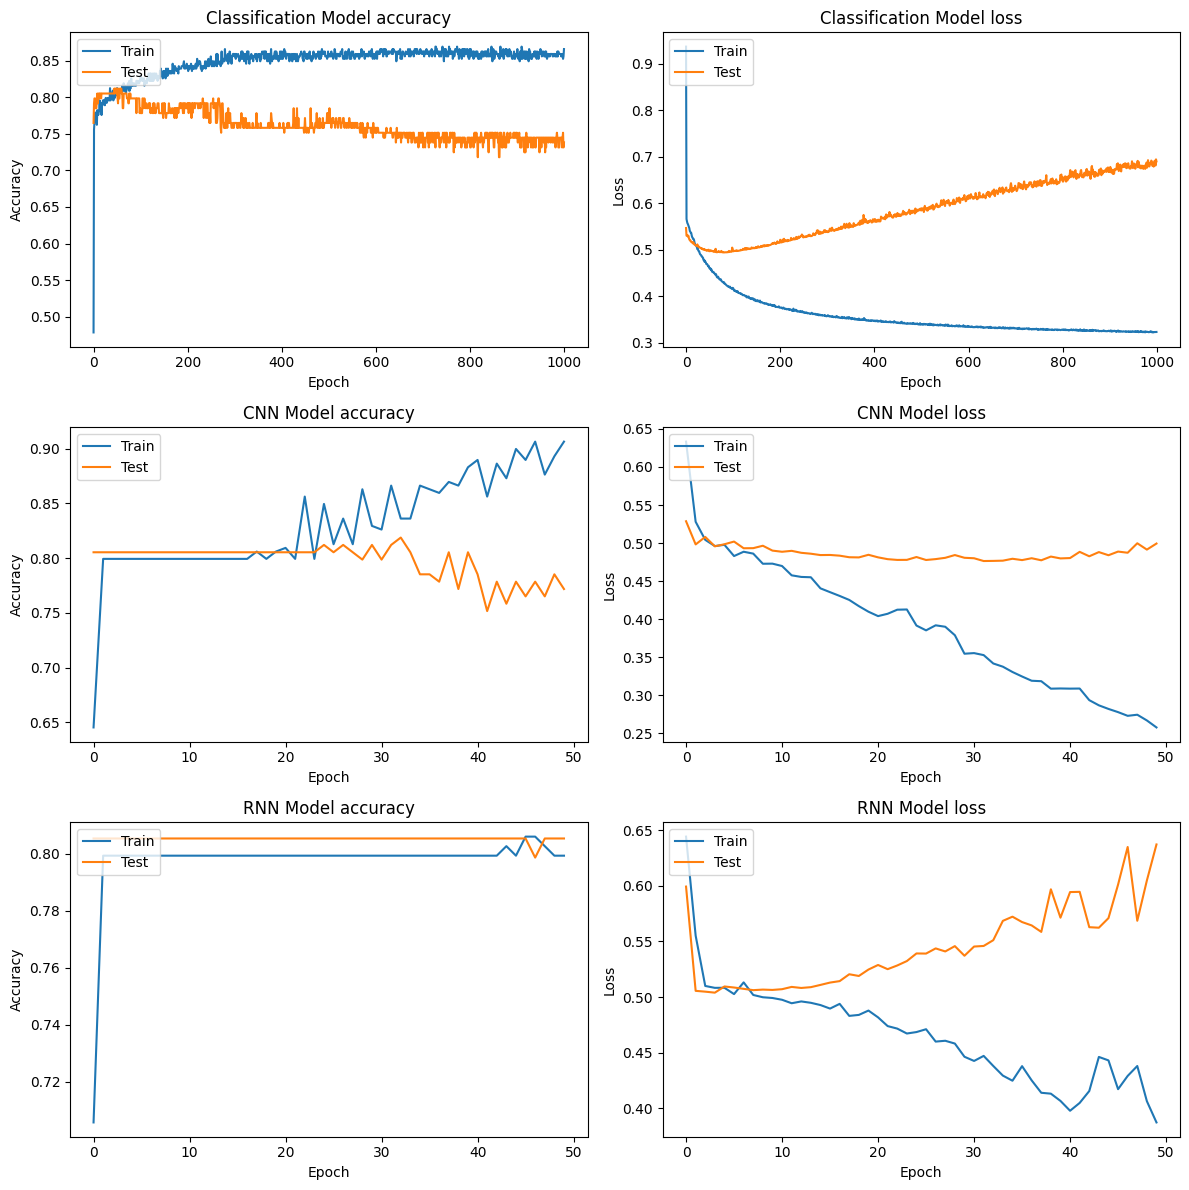

In [112]:
# Visualization
plt.figure(figsize=(12, 12))

# Classification
plt.subplot(3, 2, 1)
plt.plot(clf_history.history['accuracy'])
plt.plot(clf_history.history['val_accuracy'])
plt.title('Classification Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 2)
plt.plot(clf_history.history['loss'])
plt.plot(clf_history.history['val_loss'])
plt.title('Classification Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# CNN
plt.subplot(3, 2, 3)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 4)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# RNN
plt.subplot(3, 2, 5)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 6)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


# Scaler
## why, inf

In [117]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score

# Load data
train_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_conti.phe', delim_whitespace=True)
train_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_binary.phe', delim_whitespace=True)
test_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_conti.phe', delim_whitespace=True)
test_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_binary.phe', delim_whitespace=True)
train_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n300_p1000.mldose', delim_whitespace=True)
test_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n150_p1000.mldose', delim_whitespace=True)

# relevant columns
X_train = train_geno.iloc[:, 2:].values  # SNP data
y_train_conti = train_pheno_conti.iloc[:, 2].values  # Continuous phenotype
y_train_binary = train_pheno_binary.iloc[:, 2].values  # Binary phenotype

X_test = test_geno.iloc[:, 2:].values
y_test_conti = test_pheno_conti.iloc[:, 2].values
y_test_binary = test_pheno_binary.iloc[:, 2].values

# missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train_conti = np.nan_to_num(y_train_conti)
y_test_conti = np.nan_to_num(y_test_conti)

In [118]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
# lr
lr_model = Sequential()
lr_model.add(Dense(1, input_dim=X_train_scaled.shape[1], activation='linear'))
lr_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mean_squared_error')

# Train
lr_history = lr_model.fit(X_train_scaled, y_train_conti, epochs=100, verbose=1, validation_data=(X_test_scaled, y_test_conti))

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 2.6479 - val_loss: 2.0388
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 2.1622 - val_loss: 1.9297
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.7818 - val_loss: 1.8377
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.4912 - val_loss: 1.7733
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 1.2606 - val_loss: 1.7225
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0883 - val_loss: 1.6799
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9501 - val_loss: 1.6452
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8340 - val_loss: 1.6190
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7426 - val_loss: 1.5947
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6625 - val_loss: 1.5736
Epoch 11

5/5 [==============================] - 0s 3ms/step - loss: 1.4887
Test MSE (Linear Regression): 1.4887


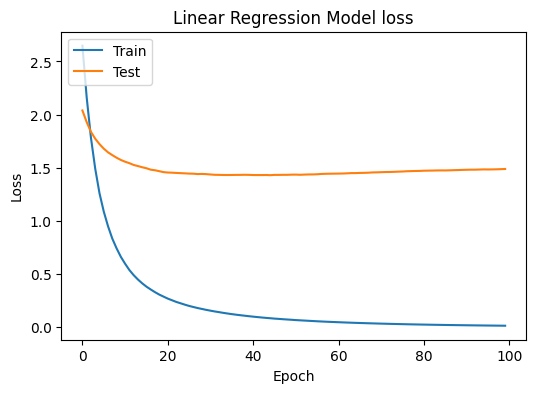

In [120]:
# Evaluate
mse = lr_model.evaluate(X_test_scaled, y_test_conti)
print(f'Test MSE (Linear Regression): {mse:.4f}')

# Visualization
plt.figure(figsize=(6, 4))
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Linear Regression Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [121]:
# classification
clf_model = Sequential()
clf_model.add(Dense(1, input_dim=X_train_scaled.shape[1], activation='sigmoid'))

clf_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train
clf_history = clf_model.fit(X_train_scaled, y_train_binary, epochs=1000, verbose=1, validation_data=(X_test_scaled, y_test_binary))

Epoch 1/1000
10/10 [==============================] - 1s 20ms/step - loss: 0.9236 - accuracy: 0.4816 - val_loss: 0.8935 - val_accuracy: 0.4966
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.8270 - accuracy: 0.5318 - val_loss: 0.8643 - val_accuracy: 0.5034
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7480 - accuracy: 0.5552 - val_loss: 0.8420 - val_accuracy: 0.5168
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5886 - val_loss: 0.8181 - val_accuracy: 0.5302
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6227 - accuracy: 0.6221 - val_loss: 0.7990 - val_accuracy: 0.5369
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5787 - accuracy: 0.6589 - val_loss: 0.7837 - val_accuracy: 0.5570
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.7258 - val_loss: 0.7686 - val_accuracy: 0.5638
Epoch

In [122]:
# Evaluate
loss, accuracy = clf_model.evaluate(X_test_scaled, y_test_binary)
print(f'Test Accuracy (Classification): {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.8038 - accuracy: 0.7785
Test Accuracy (Classification): 0.7785


In [123]:
# CNN
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
cnn_history = cnn_model.fit(X_train_cnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_binary))

Epoch 1/50
10/10 [==============================] - 2s 41ms/step - loss: 0.6407 - accuracy: 0.7391 - val_loss: 0.5770 - val_accuracy: 0.8054
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.5622 - accuracy: 0.8094 - val_loss: 0.5402 - val_accuracy: 0.8389
Epoch 3/50
10/10 [==============================] - 0s 13ms/step - loss: 0.3916 - accuracy: 0.8161 - val_loss: 0.4642 - val_accuracy: 0.8054
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.3549 - accuracy: 0.8930 - val_loss: 0.5741 - val_accuracy: 0.8054
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.3147 - accuracy: 0.8863 - val_loss: 0.4700 - val_accuracy: 0.8054
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2822 - accuracy: 0.8629 - val_loss: 0.4843 - val_accuracy: 0.8054
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2155 - accuracy: 0.9264 - val_loss: 0.4725 - val_accuracy: 0.8054
Epoch 8/50
10/1

In [124]:
# Evaluate
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_binary)
print(f'Test Accuracy (CNN): {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.9263 - accuracy: 0.7919
Test Accuracy (CNN): 0.7919


In [125]:
# RNN
X_train_rnn = np.expand_dims(X_train_scaled, axis=2)
X_test_rnn = np.expand_dims(X_test_scaled, axis=2)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
rnn_history = rnn_model.fit(X_train_rnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_rnn, y_test_binary))

Epoch 1/50
10/10 [==============================] - 14s 1s/step - loss: 0.6796 - accuracy: 0.6020 - val_loss: 0.5969 - val_accuracy: 0.8054
Epoch 2/50
10/10 [==============================] - 6s 539ms/step - loss: 0.8028 - accuracy: 0.7993 - val_loss: 0.5536 - val_accuracy: 0.8054
Epoch 3/50
10/10 [==============================] - 7s 774ms/step - loss: 0.5409 - accuracy: 0.7993 - val_loss: 0.5623 - val_accuracy: 0.8054
Epoch 4/50
10/10 [==============================] - 5s 529ms/step - loss: 0.5518 - accuracy: 0.7993 - val_loss: 0.5602 - val_accuracy: 0.8054
Epoch 5/50
10/10 [==============================] - 6s 582ms/step - loss: 0.5488 - accuracy: 0.7993 - val_loss: 0.5543 - val_accuracy: 0.8054
Epoch 6/50
10/10 [==============================] - 7s 663ms/step - loss: 0.5422 - accuracy: 0.7993 - val_loss: 0.5472 - val_accuracy: 0.8054
Epoch 7/50
10/10 [==============================] - 5s 542ms/step - loss: 0.5331 - accuracy: 0.7993 - val_loss: 0.5419 - val_accuracy: 0.8054
Epoch 8/

In [126]:
# Evaluate
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test_binary)
print(f'Test Accuracy (RNN): {accuracy:.4f}')

5/5 [==============================] - 1s 150ms/step - loss: 0.6315 - accuracy: 0.7383
Test Accuracy (RNN): 0.7383


In [127]:
# AUC Score
y_pred_binary_clf = clf_model.predict(X_test_scaled).ravel()
auc_clf = roc_auc_score(y_test_binary, y_pred_binary_clf)
print(f'Test AUC (Classification): {auc_clf:.4f}')

y_pred_binary_cnn = cnn_model.predict(X_test_cnn).ravel()
auc_cnn = roc_auc_score(y_test_binary, y_pred_binary_cnn)
print(f'Test AUC (CNN): {auc_cnn:.4f}')

y_pred_binary_rnn = rnn_model.predict(X_test_rnn).ravel()
auc_rnn = roc_auc_score(y_test_binary, y_pred_binary_rnn)
print(f'Test AUC (RNN): {auc_rnn:.4f}')



5/5 [==============================] - 0s 4ms/step
Test AUC (Classification): 0.6385
5/5 [==============================] - 0s 7ms/step
Test AUC (CNN): 0.6601
5/5 [==============================] - 1s 192ms/step
Test AUC (RNN): 0.5451


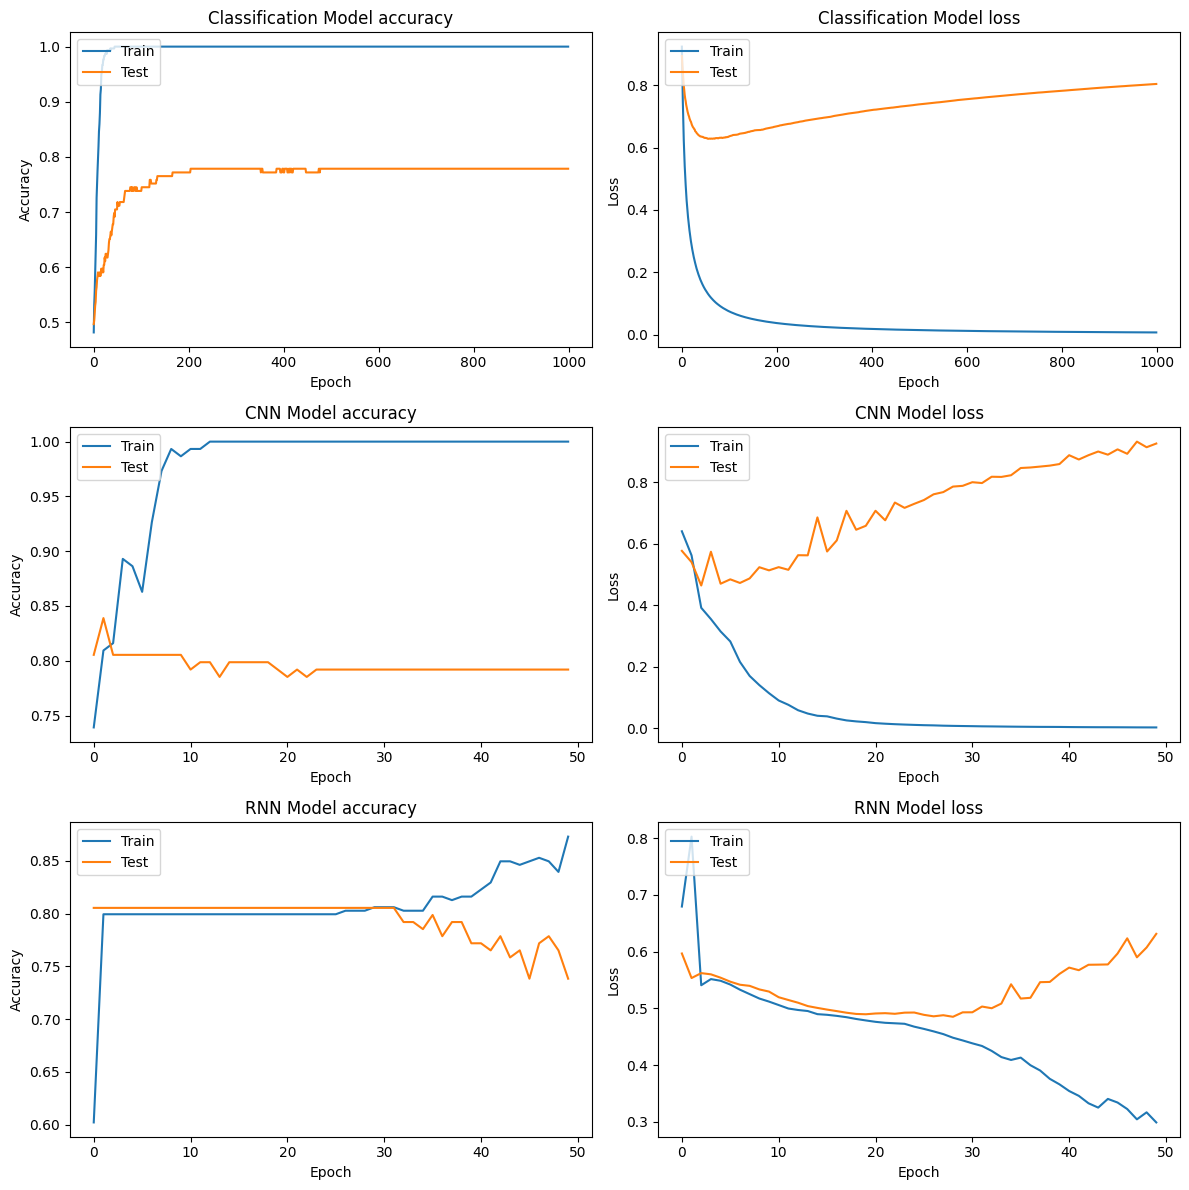

In [128]:
# Visualization
plt.figure(figsize=(12, 12))

# Classification
plt.subplot(3, 2, 1)
plt.plot(clf_history.history['accuracy'])
plt.plot(clf_history.history['val_accuracy'])
plt.title('Classification Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 2)
plt.plot(clf_history.history['loss'])
plt.plot(clf_history.history['val_loss'])
plt.title('Classification Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# CNN
plt.subplot(3, 2, 3)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 4)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# RNN
plt.subplot(3, 2, 5)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 6)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


# Regularization - Dropout, EarlyStopping

In [160]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# classification with dropout
clf_model = Sequential()
clf_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(1, activation='sigmoid'))

clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train with early stopping
clf_history = clf_model.fit(X_train_scaled, y_train_binary, epochs=1000, verbose=1, validation_data=(X_test_scaled, y_test_binary), callbacks=[early_stopping])

Epoch 1/1000
10/10 [==============================] - 1s 23ms/step - loss: 0.9220 - accuracy: 0.5786 - val_loss: 0.5837 - val_accuracy: 0.7651
Epoch 2/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.3828 - accuracy: 0.8328 - val_loss: 0.5476 - val_accuracy: 0.7852
Epoch 3/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2441 - accuracy: 0.9030 - val_loss: 0.5487 - val_accuracy: 0.7987
Epoch 4/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1381 - accuracy: 0.9565 - val_loss: 0.5606 - val_accuracy: 0.7785
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0889 - accuracy: 0.9866 - val_loss: 0.5748 - val_accuracy: 0.7852
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0697 - accuracy: 0.9833 - val_loss: 0.5886 - val_accuracy: 0.7718
Epoch 7/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0610 - accuracy: 0.9967 - val_loss: 0.5986 - val_accuracy: 0.7651
Epoch

In [161]:
# Evaluate
loss, accuracy = clf_model.evaluate(X_test_scaled, y_test_binary)
print(f'Test Accuracy (Classification): {accuracy:.4f}')

5/5 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7852
Test Accuracy (Classification): 0.7852


In [162]:
# CNN with dropout
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
cnn_history = cnn_model.fit(X_train_cnn, y_train_binary, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_binary), callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 0.5819 - accuracy: 0.7793 - val_loss: 0.5473 - val_accuracy: 0.8054
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5247 - accuracy: 0.7993 - val_loss: 0.4881 - val_accuracy: 0.8054
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4777 - accuracy: 0.7993 - val_loss: 0.4851 - val_accuracy: 0.8054
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4832 - accuracy: 0.7993 - val_loss: 0.4714 - val_accuracy: 0.8054
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4725 - accuracy: 0.8027 - val_loss: 0.4658 - val_accuracy: 0.8054
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4373 - accuracy: 0.8027 - val_loss: 0.4596 - val_accuracy: 0.8054
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4280 - accuracy: 0.8094 - val_loss: 0.4616 - val_accuracy: 0.8054
Epoch 8/100


In [163]:
# Evaluate
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_binary)
print(f'Test Accuracy (CNN): {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.4572 - accuracy: 0.8121
Test Accuracy (CNN): 0.8121


In [164]:
# For classification models
y_pred_binary_clf = clf_model.predict(X_test_scaled).ravel()
auc_clf = roc_auc_score(y_test_binary, y_pred_binary_clf)
print(f'Test AUC (Classification): {auc_clf:.4f}')

y_pred_binary_cnn = cnn_model.predict(X_test_cnn).ravel()
auc_cnn = roc_auc_score(y_test_binary, y_pred_binary_cnn)
print(f'Test AUC (CNN): {auc_cnn:.4f}')

# y_pred_binary_rnn = rnn_model.predict(X_test_rnn).ravel()
# auc_rnn = roc_auc_score(y_test_binary, y_pred_binary_rnn)
# print(f'Test AUC (RNN): {auc_rnn:.4f}')


5/5 [==============================] - 0s 3ms/step
Test AUC (Classification): 0.5744
5/5 [==============================] - 0s 4ms/step
Test AUC (CNN): 0.6885


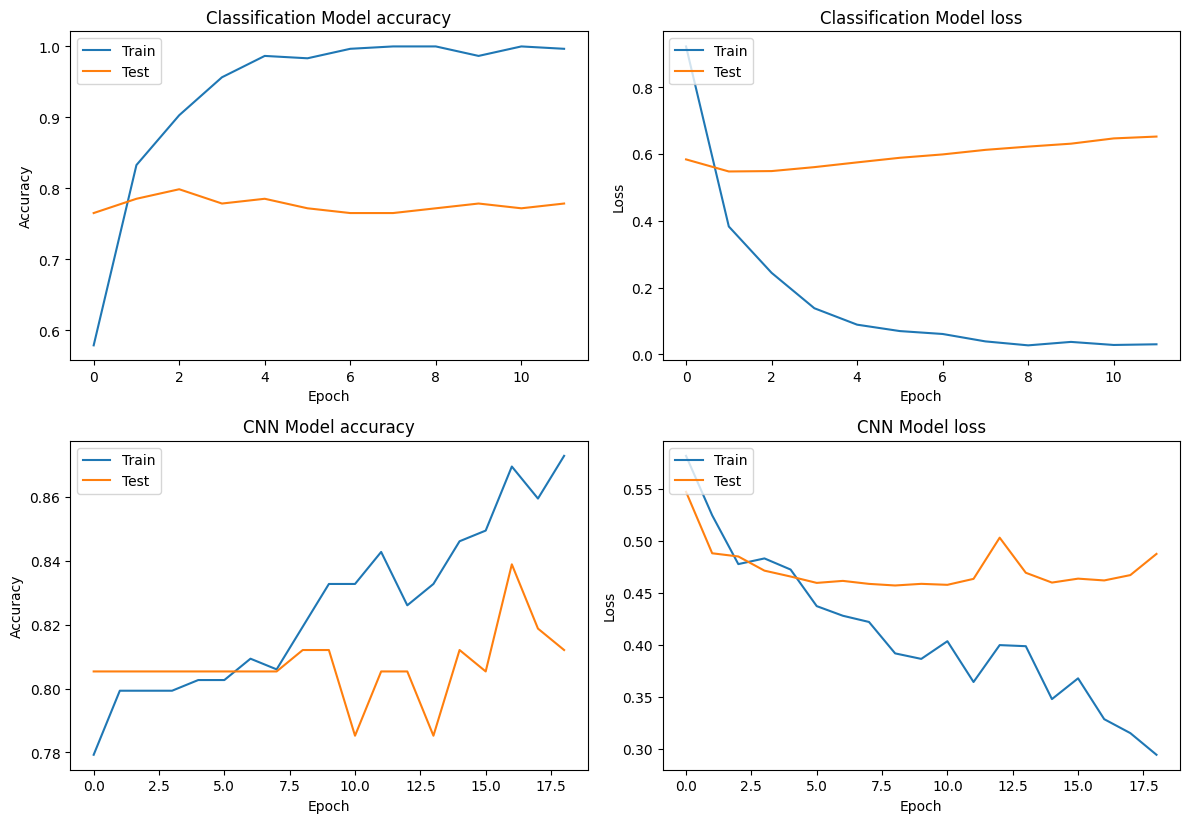

In [165]:
# Visualization
plt.figure(figsize=(12, 12))

# Classification
plt.subplot(3, 2, 1)
plt.plot(clf_history.history['accuracy'])
plt.plot(clf_history.history['val_accuracy'])
plt.title('Classification Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 2)
plt.plot(clf_history.history['loss'])
plt.plot(clf_history.history['val_loss'])
plt.title('Classification Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# CNN
plt.subplot(3, 2, 3)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 4)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.tight_layout()
plt.show()


# L2 regularize

In [135]:
from tensorflow.keras.regularizers import l2

# classification with dropout and L2 regularization
clf_model = Sequential()
clf_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001, restore_best_weights=True)
clf_history = clf_model.fit(X_train_scaled, y_train_binary, epochs=1000, verbose=1, validation_data=(X_test_scaled, y_test_binary), callbacks=[early_stopping])

Epoch 1/1000
10/10 [==============================] - 1s 24ms/step - loss: 3.3825 - accuracy: 0.4247 - val_loss: 2.8717 - val_accuracy: 0.5839
Epoch 2/1000
10/10 [==============================] - 0s 8ms/step - loss: 2.6120 - accuracy: 0.7492 - val_loss: 2.6116 - val_accuracy: 0.7852
Epoch 3/1000
10/10 [==============================] - 0s 8ms/step - loss: 2.2802 - accuracy: 0.9164 - val_loss: 2.4539 - val_accuracy: 0.7919
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 2.0621 - accuracy: 0.9532 - val_loss: 2.3291 - val_accuracy: 0.7919
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9207 - accuracy: 0.9532 - val_loss: 2.2194 - val_accuracy: 0.8054
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.7757 - accuracy: 0.9766 - val_loss: 2.1038 - val_accuracy: 0.8054
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.6326 - accuracy: 0.9933 - val_loss: 1.9970 - val_accuracy: 0.8121
Epoch

In [136]:
# Evaluate
loss, accuracy = clf_model.evaluate(X_test_scaled, y_test_binary)
print(f'Test Accuracy (Classification): {accuracy:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.7987
Test Accuracy (Classification): 0.7987


In [137]:
# CNN with dropout and L2 regularization
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1), kernel_regularizer=l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
cnn_history = cnn_model.fit(X_train_cnn, y_train_binary, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_binary), callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 3.5769 - accuracy: 0.6789 - val_loss: 2.2416 - val_accuracy: 0.8054
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 2.0309 - accuracy: 0.7926 - val_loss: 1.7764 - val_accuracy: 0.8054
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 1.6051 - accuracy: 0.8027 - val_loss: 1.4293 - val_accuracy: 0.8054
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 1.2609 - accuracy: 0.8060 - val_loss: 1.1820 - val_accuracy: 0.8054
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0579 - accuracy: 0.8161 - val_loss: 1.0261 - val_accuracy: 0.8054
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 0.9166 - accuracy: 0.8495 - val_loss: 0.9974 - val_accuracy: 0.8054
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.8116 - accuracy: 0.8127 - val_loss: 0.8834 - val_accuracy: 0.7987
Epoch 

In [138]:
# Evaluate
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_binary)
print(f'Test Accuracy (CNN): {accuracy:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 0.7509 - accuracy: 0.8054
Test Accuracy (CNN): 0.8054


5/5 [==============================] - 0s 2ms/step
Test AUC (Classification): 0.7046
5/5 [==============================] - 0s 2ms/step
Test AUC (CNN): 0.6563


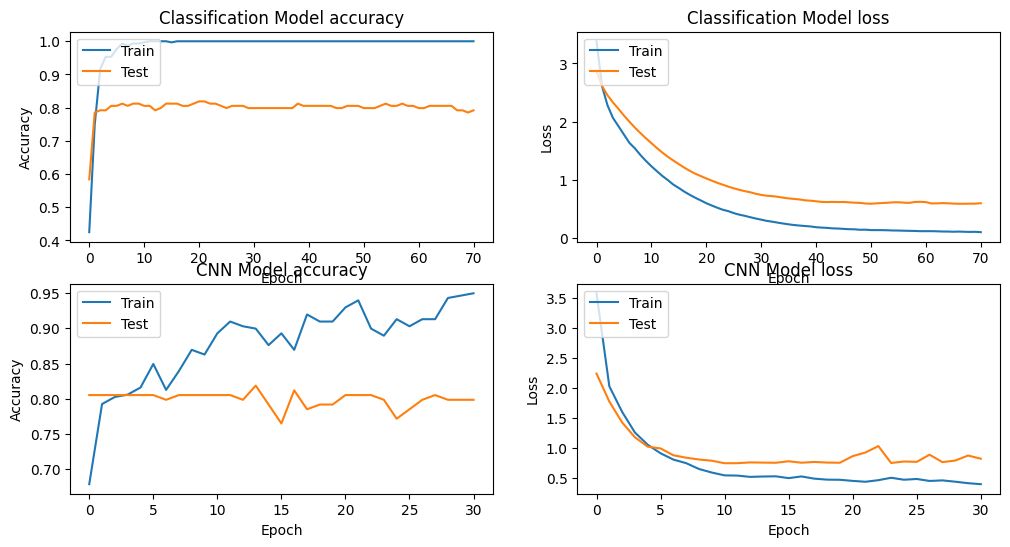

In [139]:
# AUC Score
y_pred_binary_clf = clf_model.predict(X_test_scaled).ravel()
auc_clf = roc_auc_score(y_test_binary, y_pred_binary_clf)
print(f'Test AUC (Classification): {auc_clf:.4f}')

y_pred_binary_cnn = cnn_model.predict(X_test_cnn).ravel()
auc_cnn = roc_auc_score(y_test_binary, y_pred_binary_cnn)
print(f'Test AUC (CNN): {auc_cnn:.4f}')

# Visualization
# classification
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(clf_history.history['accuracy'])
plt.plot(clf_history.history['val_accuracy'])
plt.title('Classification Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(clf_history.history['loss'])
plt.plot(clf_history.history['val_loss'])
plt.title('Classification Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# CNN
plt.subplot(2, 2, 3)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2, 2, 4)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# select SNP + scale + regularize

In [166]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score

# Load data
train_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_conti.phe', delim_whitespace=True)
train_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_binary.phe', delim_whitespace=True)
test_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_conti.phe', delim_whitespace=True)
test_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_binary.phe', delim_whitespace=True)

train_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n300_p1000.mldose', delim_whitespace=True)
test_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n150_p1000.mldose', delim_whitespace=True)

# relevant columns
X_train = train_geno.iloc[:, 2:].values  # SNP data
y_train_conti = train_pheno_conti.iloc[:, 2].values  # Continuous phenotype
y_train_binary = train_pheno_binary.iloc[:, 2].values  # Binary phenotype

X_test = test_geno.iloc[:, 2:].values
y_test_conti = test_pheno_conti.iloc[:, 2].values
y_test_binary = test_pheno_binary.iloc[:, 2].values

# missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train_conti = np.nan_to_num(y_train_conti)
y_test_conti = np.nan_to_num(y_test_conti)

In [167]:
# Calculate variance for each SNP
variances = np.var(X_train, axis=0)

# Select top 100 SNP with highest variance
top_snp_indices = np.argsort(variances)[-100:]
X_train_selected = X_train[:, top_snp_indices]
X_test_selected = X_test[:, top_snp_indices]

# Standardize
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_selected)
X_test_sel_scaled = scaler.transform(X_test_selected)

In [168]:
# lr
lr_model = Sequential()
lr_model.add(Dense(1, input_dim=X_train_sel_scaled.shape[1], activation='linear'))

lr_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mean_squared_error')

# Train
lr_history = lr_model.fit(X_train_sel_scaled, y_train_conti, epochs=100, verbose=1, validation_data=(X_test_sel_scaled, y_test_conti))

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 2.7647 - val_loss: 2.2878
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 2.6331 - val_loss: 2.1973
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 2.5146 - val_loss: 2.1140
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 2.4077 - val_loss: 2.0367
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 2.3061 - val_loss: 1.9618
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 2.2108 - val_loss: 1.8962
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 2.1217 - val_loss: 1.8343
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 2.0374 - val_loss: 1.7800
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 1.9595 - val_loss: 1.7312
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 1.8938 - val_loss: 1.6865
Epoch 11

5/5 [==============================] - 0s 3ms/step - loss: 1.0121
Test MSE (Linear Regression): 1.0121


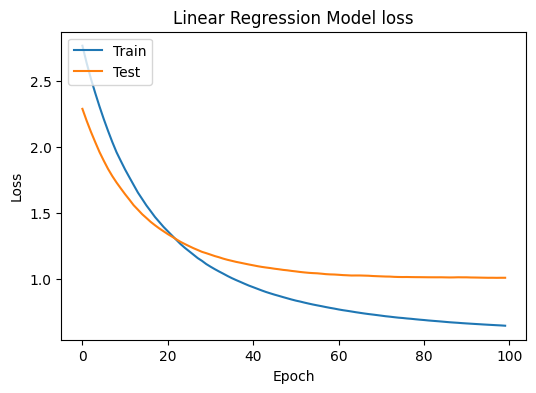

In [169]:
# Evaluate
mse = lr_model.evaluate(X_test_sel_scaled, y_test_conti)
print(f'Test MSE (Linear Regression): {mse:.4f}')

# Visualization
plt.figure(figsize=(6, 4))
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Linear Regression Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [170]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# classification
clf_model = Sequential()
clf_model.add(Dense(128, input_dim=X_train_sel_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001, restore_best_weights=True)
clf_history = clf_model.fit(X_train_sel_scaled, y_train_binary, epochs=1000, verbose=1, validation_data=(X_test_sel_scaled, y_test_binary), callbacks=[early_stopping])

Epoch 1/1000
10/10 [==============================] - 1s 24ms/step - loss: 1.8222 - accuracy: 0.5886 - val_loss: 1.6789 - val_accuracy: 0.6644
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.6596 - accuracy: 0.6957 - val_loss: 1.5625 - val_accuracy: 0.7584
Epoch 3/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.5487 - accuracy: 0.7358 - val_loss: 1.4791 - val_accuracy: 0.7987
Epoch 4/1000
10/10 [==============================] - 0s 9ms/step - loss: 1.4375 - accuracy: 0.7692 - val_loss: 1.4144 - val_accuracy: 0.8121
Epoch 5/1000
10/10 [==============================] - 0s 9ms/step - loss: 1.3485 - accuracy: 0.8060 - val_loss: 1.3589 - val_accuracy: 0.8121
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.2719 - accuracy: 0.8060 - val_loss: 1.3090 - val_accuracy: 0.8121
Epoch 7/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.1764 - accuracy: 0.8294 - val_loss: 1.2625 - val_accuracy: 0.8121
Epoch

In [171]:
# Evaluate
loss, accuracy = clf_model.evaluate(X_test_sel_scaled, y_test_binary)
print(f'Test Accuracy (Classification): {accuracy:.4f}')


5/5 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.7718
Test Accuracy (Classification): 0.7718


In [172]:
# CNN
X_train_cnn = np.expand_dims(X_train_sel_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_sel_scaled, axis=2)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1), kernel_regularizer=l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
cnn_history = cnn_model.fit(X_train_cnn, y_train_binary, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_binary), callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 2.8629 - accuracy: 0.7726 - val_loss: 2.4229 - val_accuracy: 0.8054
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 2.1598 - accuracy: 0.8060 - val_loss: 1.8769 - val_accuracy: 0.8054
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 1.6979 - accuracy: 0.7993 - val_loss: 1.4918 - val_accuracy: 0.8054
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 1.3603 - accuracy: 0.7993 - val_loss: 1.2355 - val_accuracy: 0.8054
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 1.1707 - accuracy: 0.7993 - val_loss: 1.0682 - val_accuracy: 0.8054
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.9825 - accuracy: 0.8060 - val_loss: 0.9503 - val_accuracy: 0.8054
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9007 - accuracy: 0.8027 - val_loss: 0.8797 - val_accuracy: 0.8054
Epoch 8/10

In [173]:
# Evaluate
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_binary)
print(f'Test Accuracy (CNN): {accuracy:.4f}')

5/5 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.7987
Test Accuracy (CNN): 0.7987


In [177]:
# RNN
X_train_rnn = np.expand_dims(X_train_sel_scaled, axis=2)
X_test_rnn = np.expand_dims(X_test_sel_scaled, axis=2)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1), kernel_regularizer=l2(0.01), dropout=0.5, recurrent_dropout=0.5))
rnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001, restore_best_weights=True)

# Train
rnn_history = rnn_model.fit(X_train_rnn, y_train_binary, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_rnn, y_test_binary), callbacks=[early_stopping_rnn])

Epoch 1/50
10/10 [==============================] - 3s 123ms/step - loss: 1510.9421 - accuracy: 0.5719 - val_loss: 0.6922 - val_accuracy: 0.7181
Epoch 2/50
10/10 [==============================] - 1s 92ms/step - loss: 2.7691 - accuracy: 0.6355 - val_loss: 0.6915 - val_accuracy: 0.7315
Epoch 3/50
10/10 [==============================] - 1s 97ms/step - loss: 1.0734 - accuracy: 0.6421 - val_loss: 0.6899 - val_accuracy: 0.7450
Epoch 4/50
10/10 [==============================] - 1s 99ms/step - loss: 1.1092 - accuracy: 0.5552 - val_loss: 0.6877 - val_accuracy: 0.7383
Epoch 5/50
10/10 [==============================] - 1s 98ms/step - loss: 0.8409 - accuracy: 0.6288 - val_loss: 0.6856 - val_accuracy: 0.7517
Epoch 6/50
10/10 [==============================] - 1s 98ms/step - loss: 0.7912 - accuracy: 0.5786 - val_loss: 0.6833 - val_accuracy: 0.7785
Epoch 7/50
10/10 [==============================] - 1s 96ms/step - loss: 0.7893 - accuracy: 0.5987 - val_loss: 0.6810 - val_accuracy: 0.7987
Epoch 8/5

In [178]:
# Evaluate
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test_binary)
print(f'Test Accuracy (RNN): {accuracy:.4f}')

5/5 [==============================] - 0s 18ms/step - loss: 0.6035 - accuracy: 0.8054
Test Accuracy (RNN): 0.8054


In [179]:
# AUC Score
y_pred_binary_clf = clf_model.predict(X_test_sel_scaled).ravel()
auc_clf = roc_auc_score(y_test_binary, y_pred_binary_clf)
print(f'Test AUC (Classification): {auc_clf:.4f}')

y_pred_binary_cnn = cnn_model.predict(X_test_cnn).ravel()
auc_cnn = roc_auc_score(y_test_binary, y_pred_binary_cnn)
print(f'Test AUC (CNN): {auc_cnn:.4f}')

y_pred_binary_rnn = rnn_model.predict(X_test_rnn).ravel()
auc_rnn = roc_auc_score(y_test_binary, y_pred_binary_rnn)
print(f'Test AUC (RNN): {auc_rnn:.4f}')

5/5 [==============================] - 0s 3ms/step
Test AUC (Classification): 0.6089
5/5 [==============================] - 0s 4ms/step
Test AUC (CNN): 0.6773
5/5 [==============================] - 0s 18ms/step
Test AUC (RNN): 0.4862


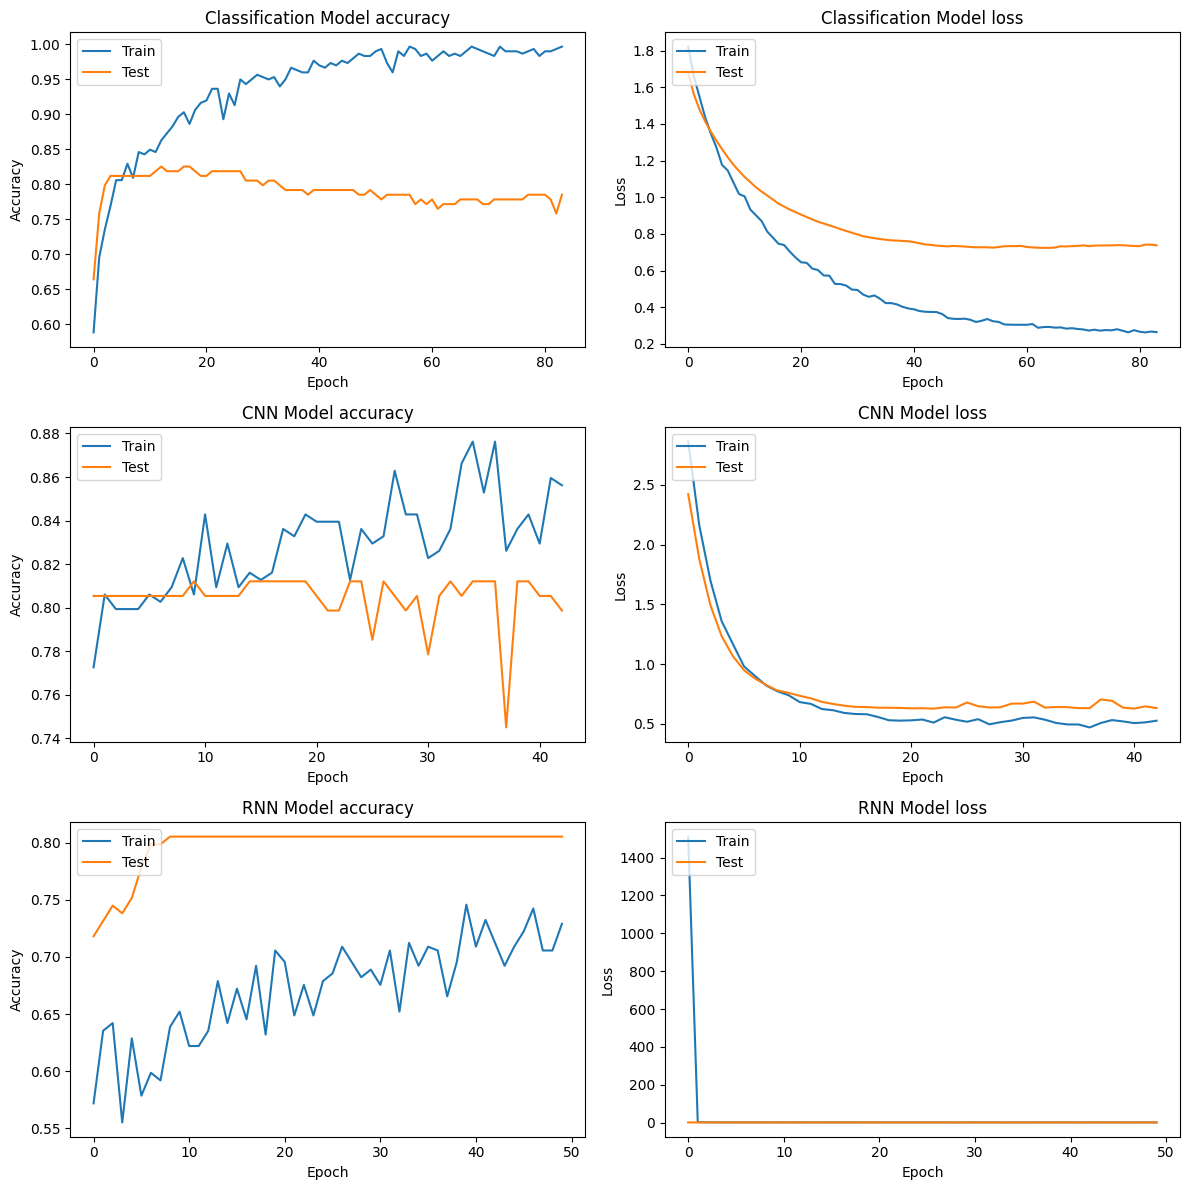

In [180]:
# Visualization
plt.figure(figsize=(12, 12))

# Classification
plt.subplot(3, 2, 1)
plt.plot(clf_history.history['accuracy'])
plt.plot(clf_history.history['val_accuracy'])
plt.title('Classification Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 2)
plt.plot(clf_history.history['loss'])
plt.plot(clf_history.history['val_loss'])
plt.title('Classification Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# CNN
plt.subplot(3, 2, 3)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 4)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# RNN
plt.subplot(3, 2, 5)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(3, 2, 6)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
